# Import statements

In [1]:
import math
import matplotlib.pyplot as plt
import random

# Functions

In [2]:
def AIMD(a:int=1, b:float=0.5, cwnd:int=10, data_packet:tuple=(None, "Dropped"), RTT_tracker:list=[])->list:
    """This function mimics the Additive Increase and Multiplicative Decrease Mechanism in TCP Congestion Control.

    Parameters
    ----------
    a: int-type
    This constant controls the rate of Additive Increase. This optimises the efficiency of the network.
    
    b: float-type
    This constant controls the rate of Multiplicative Decrease. This optimises the fairness of the network.
    This value is between 0 (exclusive) and alpha (exclusive).
    
    With these two parameters, the network system converges to optimal network conditions where the fairness line intersects with the 
    efficiency line.
    
    cwnd: int-type
    This denotes the current window size.
    
    data_packet: tuple-type
    This represents the data packet to be transferred through the network.
    
    RTT_tracker: list-type
    This tracks the RTT to cwnd size.
    
    Returns
    -------
    cwnd load
    """
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd*(1-b))
        # cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    return cwnd

def generate_data_packets(num_packets, drop_probability):
    """
    Generate a list of tuples representing data packets with randomly dropped packets.

    Parameters:
    - num_packets: The total number of data packets.
    - drop_probability: The probability of a packet being dropped (a float between 0 and 1).

    Returns:
    - A list of tuples representing data packets.
    """
    data_packets = [(x, "Transfer") if random.random() > drop_probability else (x, "Dropped") for x in range(1, num_packets + 1)]
    return data_packets

def generate_data_packets_consistent_drops(num_packets):
    return [(x, "Transfer") if x % 5 != 0 else (x, "Dropped") for x in range(1, num_packets+1)]

def simulate_tcp_congestion(ai, md, initial_cwnd, num__packets, drop_probability):
    # Set Up for Data
    data_packets = generate_data_packets(100,0.2)
    # Parameters
    cwnd = 10
    a = 1
    b = 0.5

    # Iterate
    RTT_tracker = []
    for data_packet in data_packets:
        cwnd = AIMD(a, b, cwnd, data_packet, RTT_tracker)

    # Visualise
    x, y = [], []
    for idx, cwnd in enumerate(RTT_tracker):
        print(f"RTT {idx + 1}:\t", cwnd)
        x.append(idx + 1)
        y.append(cwnd)

    # fig, ax = plt.subplots()
    # ax.plot(x, y)
    # ax.set_xlabel("RTT")
    # ax.set_ylabel("CWND")
    # ax.set_title(f"RTT vs CWND with a={a} and b={b}")

    # return fig, ax
    return x,y

# CWND vs RTT

RTT 1:	 11
RTT 2:	 12
RTT 3:	 13
RTT 4:	 14
RTT 5:	 15
RTT 6:	 16
RTT 7:	 17
RTT 8:	 18
RTT 9:	 19
RTT 10:	 20
RTT 11:	 21
RTT 12:	 22
RTT 13:	 23
RTT 14:	 24
RTT 15:	 12
RTT 16:	 6
RTT 17:	 3
RTT 18:	 1
RTT 19:	 2
RTT 20:	 1
RTT 21:	 0
RTT 22:	 1
RTT 23:	 2
RTT 24:	 3
RTT 25:	 4
RTT 26:	 2
RTT 27:	 3
RTT 28:	 4
RTT 29:	 2
RTT 30:	 1
RTT 31:	 2
RTT 32:	 3
RTT 33:	 4
RTT 34:	 5
RTT 35:	 2
RTT 36:	 3
RTT 37:	 4
RTT 38:	 5
RTT 39:	 6
RTT 40:	 7
RTT 41:	 8
RTT 42:	 9
RTT 43:	 10
RTT 44:	 11
RTT 45:	 12
RTT 46:	 6
RTT 47:	 7
RTT 48:	 3
RTT 49:	 4
RTT 50:	 2
RTT 51:	 3
RTT 52:	 4
RTT 53:	 5
RTT 54:	 6
RTT 55:	 7
RTT 56:	 8
RTT 57:	 9
RTT 58:	 10
RTT 59:	 11
RTT 60:	 12
RTT 61:	 13
RTT 62:	 6
RTT 63:	 7
RTT 64:	 3
RTT 65:	 4
RTT 66:	 5
RTT 67:	 6
RTT 68:	 7
RTT 69:	 8
RTT 70:	 9
RTT 71:	 4
RTT 72:	 5
RTT 73:	 2
RTT 74:	 3
RTT 75:	 4
RTT 76:	 5
RTT 77:	 6
RTT 78:	 3
RTT 79:	 4
RTT 80:	 5
RTT 81:	 6
RTT 82:	 7
RTT 83:	 8
RTT 84:	 9
RTT 85:	 10
RTT 86:	 11
RTT 87:	 12
RTT 88:	 13
RTT 89:	 14
RTT

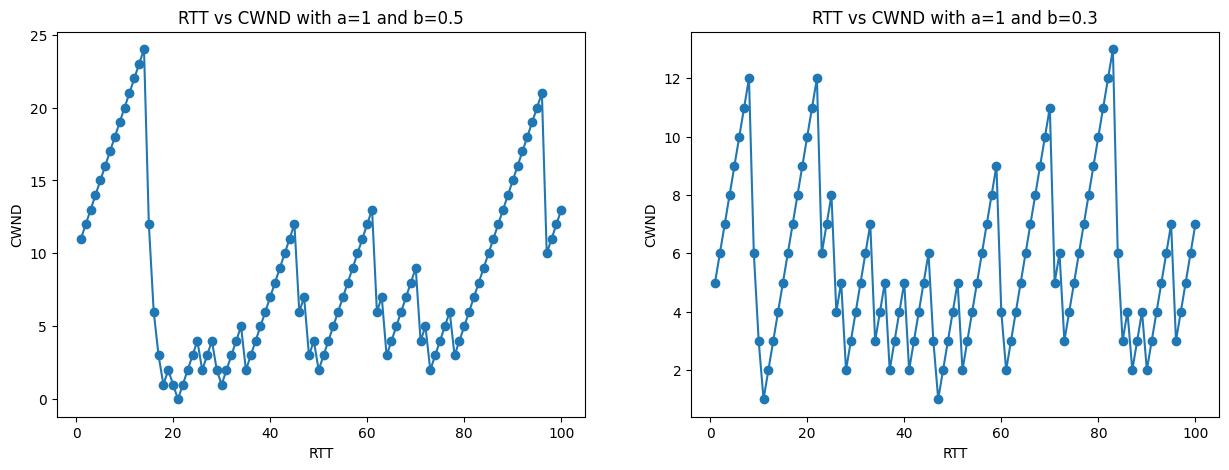

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

x1_md, y1 = simulate_tcp_congestion(ai=1, md=0.5, initial_cwnd=10, num__packets=50, drop_probability=0.2)
x2, y2 = simulate_tcp_congestion(ai=1, md=0.3, initial_cwnd=10, num__packets=50, drop_probability=0.2)

# Assign each subplot to a specific position
axs[0].plot(x1_md,y1,marker='o')
axs[0].set_xlabel("RTT")
axs[0].set_ylabel("CWND")
axs[0].set_title(f"RTT vs CWND with a={1} and b={0.5}")

axs[1].plot(x2,y2,marker='o')
axs[1].set_xlabel("RTT")
axs[1].set_ylabel("CWND")
axs[1].set_title(f"RTT vs CWND with a={1} and b={0.3}")

plt.show()

# X1 vs X2 user allocation

## Linear

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def tcp_congestion_control(X1_initial, X2_initial, X_goal, a1, b1, a2, b2, a1_func=None, a2_func=None, b1_func=None, b2_func=None, num_steps=20):
    # Initialize arrays to store trajectory points
    X1_values = [X1_initial]
    X2_values = [X2_initial]
    fairness_values = [0]

    for _ in range(num_steps):
        # Calculate fairness at the current point
        fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
        fairness_values.append(fairness_value)

        # Check whether the system is underloaded, overloaded, or efficient
        if X1_values[-1] + X2_values[-1] < X_goal:
            # Underloaded: Apply additive increase
            if a1_func is not None:
                X1_values.append(a1_func(X1_values[-1], a1))
            else:
                X1_values.append(X1_values[-1] + a1)
            if a2_func is not None:
                X2_values.append(a2_func(X2_values[-1], a2))
            else:
                X2_values.append(X2_values[-1] + a2)
        elif X1_values[-1] + X2_values[-1] > X_goal:
            # Overloaded: Apply multiplicative decrease
            if b1_func is not None:
                X1_values.append(b1_func(X1_values[-1],b1))
            else:
                X1_values.append(X1_values[-1] / b1)
            if b2_func is not None:
                X2_values.append(b2_func(X2_values[-1],b2))
            else:
                X2_values.append(X2_values[-1] / b2)
        # else:
        #     # Efficient: Stay at the optimal point
        #     X1_values.append(X_goal / 2)
        #     X2_values.append(X_goal / 2)

    # Plot the trajectory
    plt.plot(X1_values, X2_values, marker='o', label='Trajectory')
    plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
    plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')


    # Mark the optimal point
    plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

    # Add labels and legend
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

    # Show the plot
    plt.show()

    return X1_values, X2_values

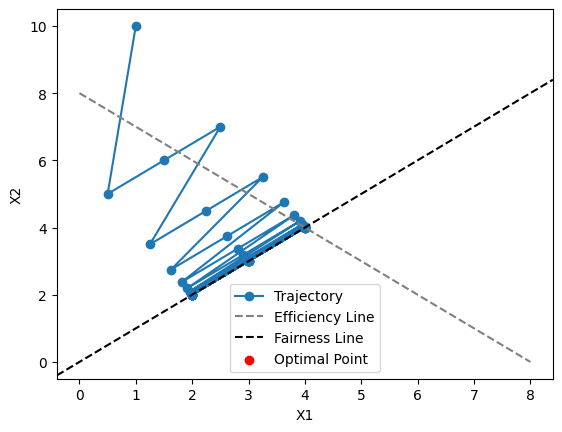

In [5]:
# Run the simulation
X1_values, X2_values = tcp_congestion_control(X1_initial=1, X2_initial=10, X_goal=8, 
                                              a1=1, b1=2, a2=1, b2=2, num_steps=50)

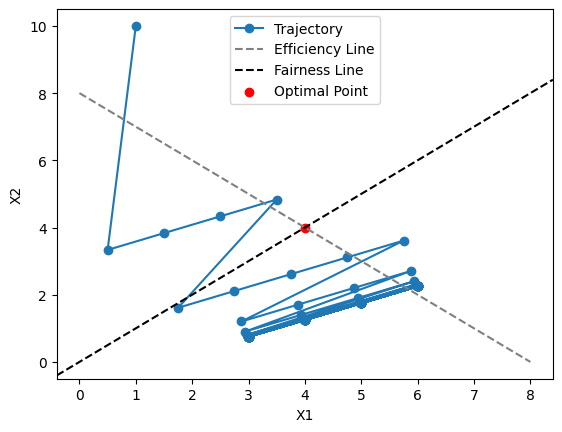

In [6]:
X1_values, X2_values = tcp_congestion_control(X1_initial=1, X2_initial=10, X_goal=8, a1=1, b1=2, a2=0.5, b2=3, num_steps=100)

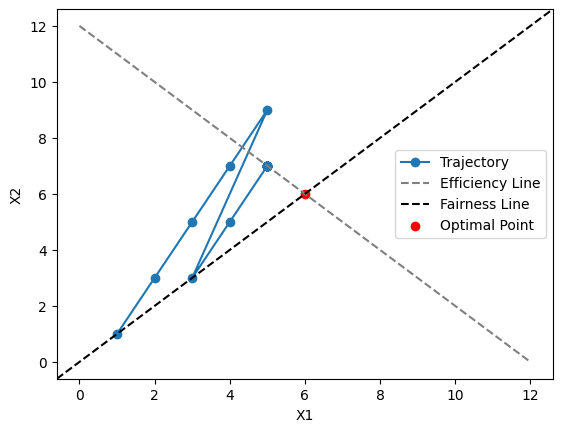

In [7]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 20
X_goal = 12
exponent1 = 0.5
exponent2 = 0.3
alpha1 = 1
alpha2 = 2
alpha = 0.1

# Initialize arrays to store trajectory points
X1_values = [1]
X2_values = [1]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    # fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    # fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 < X_goal:
        # Underloaded: Apply additive increase
        x1 = x1 + alpha1
        x2 = x2 + alpha2

    elif x1 + x2 > X_goal:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * exponent1
        x2 = x2 * exponent2

    x1 = math.ceil(x1)
    x2 = math.ceil(x2)

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,3])
# plt.ylim([0,3])
plt.legend()

# Show the plot
plt.show()

## Non linear additive increase

### log

x1:4
x2:2
-------
x1:7
x2:3
-------
x1:10
x2:4
-------
x1:12
x2:5
-------
x1:6
x2:3
-------
x1:9
x2:4
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-------
x1:11
x2:5
-----

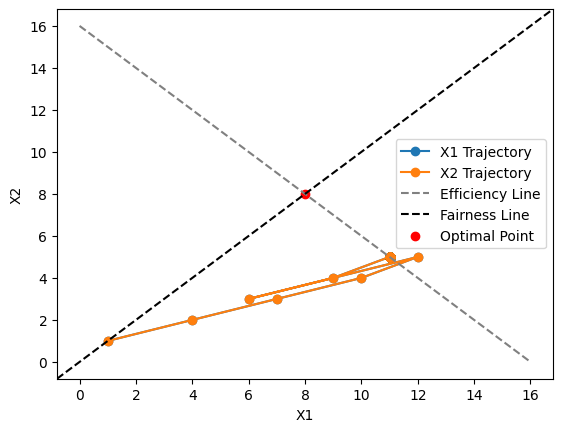

In [8]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 100
X_goal = 16
exponent1 = 1/2
exponent2 = 1/2
alpha1 = 0
alpha2 = 1

# Initialize arrays to store trajectory points
X1_values = [1]
X2_values = [1]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 < X_goal:
        # Underloaded: Apply additive increase
        if x1 <= 0:
            x1 = 1
        x1 = x1 + np.log(X_goal-x1)
        x2 = x2 + 1

    elif x1 + x2 > X_goal:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * exponent1
        x2 = x2 * exponent2

    x1 = math.ceil(x1)
    x2 = math.ceil(x2)

    print(f"x1:{x1}")
    print(f"x2:{x2}")
    print(f"-------")


    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()


### Tutorial sample answer

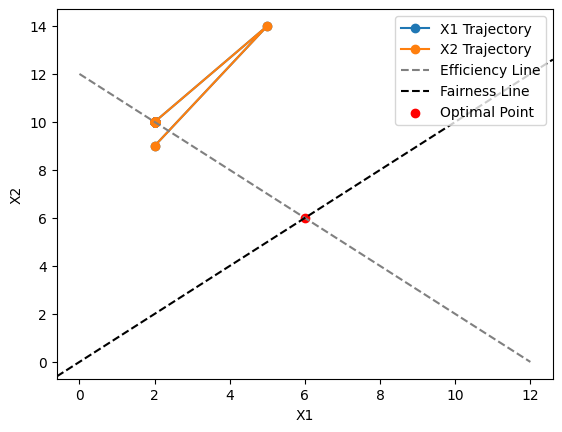

In [29]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 50
X_goal = 12
exponent1 = 1/3
exponent2 = 1-exponent1
alpha = 2
alpha1 = alpha
alpha2 = alpha

# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 < X_goal:
        # Underloaded: Apply additive increase
        alpha1 = alpha * np.power(x1, exponent1)
        alpha2 = alpha * np.log(x2 + 1)

        x1 = x1 + alpha1
        x2 = x2 + alpha2

    elif x1 + x2 > X_goal:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * exponent1
        x2 = x2 * exponent2

    x1 = math.ceil(x1)
    x2 = math.ceil(x2)

    # print(f"x1:{x1}")
    # print(f"x2:{x2}")

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

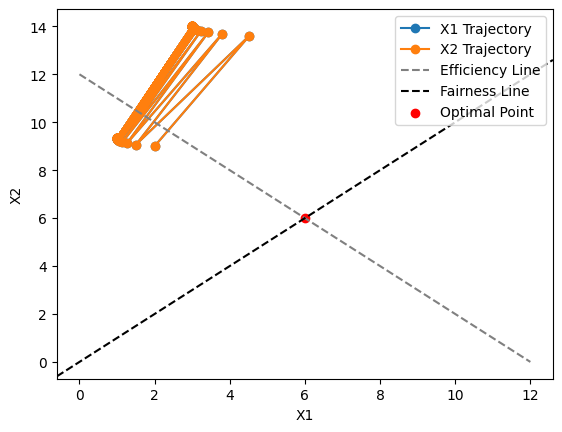

In [30]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 50
X_goal = 12
exponent1 = 1/3
exponent2 = 1-exponent1
alpha = 2
alpha1 = alpha
alpha2 = alpha


# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        alpha1 = alpha * np.power(x1, exponent1)
        alpha2 = alpha * np.log(x2 + 1)

        x1 = x1 + alpha1
        x2 = x2 + alpha2

    # elif x1 + x2 > X_goal:
    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * exponent1
        x2 = x2 * exponent2

    # x1 = math.ceil(x1)
    # x2 = math.ceil(x2)

    # print(f"x1:{x1}")
    # print(f"x2:{x2}")

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

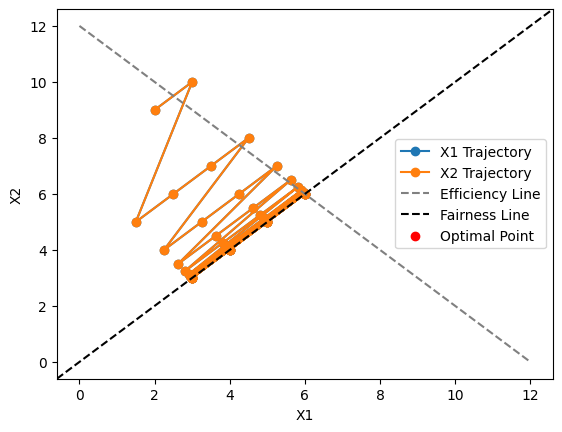

In [31]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 50
X_goal = 12
beta1 = 1/2
beta2 = 1/2
alpha1 = 1
alpha2 = 1


# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        x1 = x1 + alpha1
        x2 = x2 + alpha2

    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * beta1
        x2 = x2 * beta2

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

### Own experiment #1

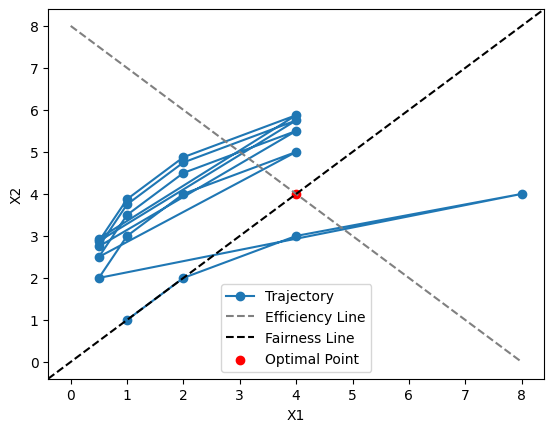

In [10]:
def custom_exp(w,a):
    return math.exp(w)

def custom_log(w,a):
    return math.log(w)

def custom_reno_a(w, a):
    return w + (w*a)

def custom_renob(w, b):
    return w / (w*b)

X1_values, X2_values = tcp_congestion_control(X1_initial=1, X2_initial=1, X_goal=8, 
                                              a1=1, b1=2, a2=1, b2=2,
                                              a1_func=custom_reno_a, a2_func=None , b1_func=custom_renob, b2_func=None,
                                              num_steps=20)

### Own experiment #2

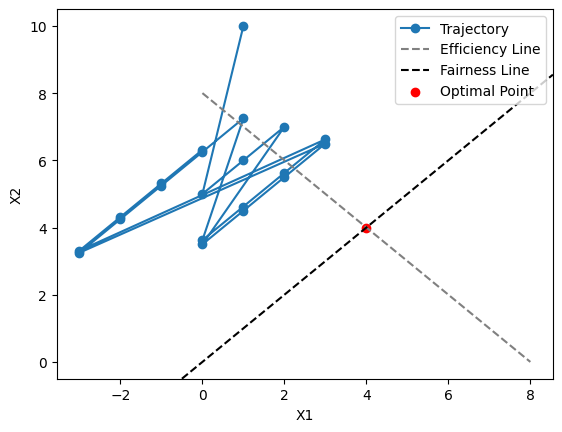

In [11]:
def asd_b(w, b):
    return math.floor(1 - (w/b)) * w

def x1_ai(w, a):
    return w + a

X1_values, X2_values = tcp_congestion_control(X1_initial=1, X2_initial=10, X_goal=8, 
                                              a1=1, b1=2, a2=1, b2=2,
                                              a1_func=x1_ai, a2_func=None , b1_func=asd_b, b2_func=None,
                                              num_steps=20)

# ETC

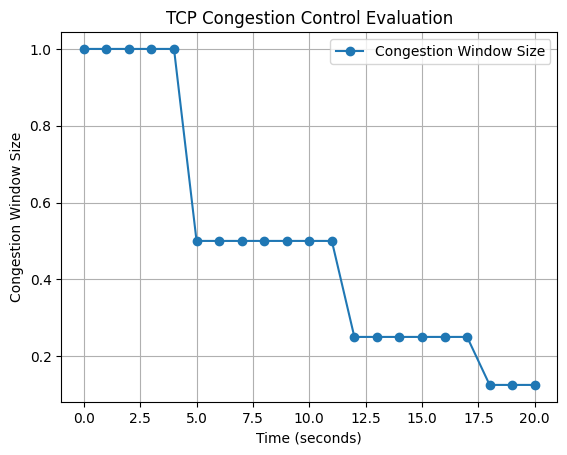

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_congestion_control(total_time, additive_increase_interval, multiplicative_decrease_events):
    # Simulated time and congestion window data
    time = np.arange(0, total_time + 1, 1)  # Time in seconds
    congestion_window = [1] * len(time)  # Initial congestion window size

    # Simulate congestion events
    for event_time in multiplicative_decrease_events:
        congestion_window[event_time:] = np.multiply(congestion_window[event_time:], 0.5)  # Multiplicative decrease

    # Simulate recovery and growth periods
    recovery_time = max(multiplicative_decrease_events) + additive_increase_interval
    congestion_window[recovery_time:] = np.add(congestion_window[recovery_time:], 1)  # Additive increase

    # Plotting the Congestion Window Size over Time
    plt.plot(time, congestion_window, label='Congestion Window Size', marker='o')
    plt.title('TCP Congestion Control Evaluation')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Congestion Window Size')
    plt.legend()
    plt.grid(True)
    plt.show()

simulate_congestion_control(total_time=20, additive_increase_interval=5, multiplicative_decrease_events=[5, 12, 18])

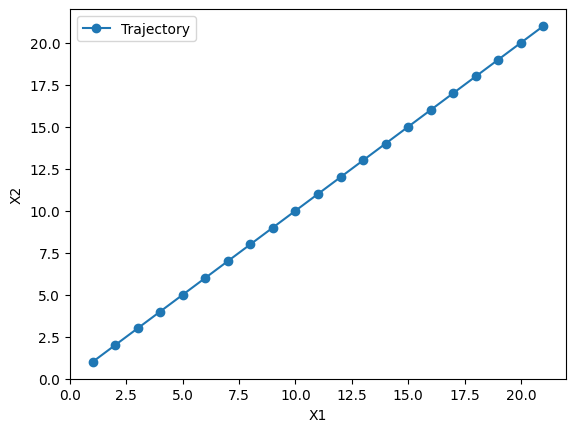

In [13]:
# Set Up for Data
data_packets = generate_data_packets(20, 0.2)

# Parameters
cwnd = 1
a = 1
b = 0.5

# Initialize arrays to store trajectory points
X1_values = [cwnd]
X2_values = [cwnd]

# Iterate through data packets
for data_packet in data_packets:
    cwnd = AIMD(a, b, cwnd, data_packet)

    # Check packet status and adjust congestion control accordingly
    _, status = data_packet
    if status == "Dropped":
        cwnd = max(1, math.floor(cwnd * b))  # Example: Multiplicative decrease for dropped packets

    # Update trajectory
    X1_values.append(X1_values[-1] + a)
    X2_values.append(X2_values[-1] + a)

# Visualize
plt.plot(X1_values, X2_values, marker='o', label='Trajectory')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

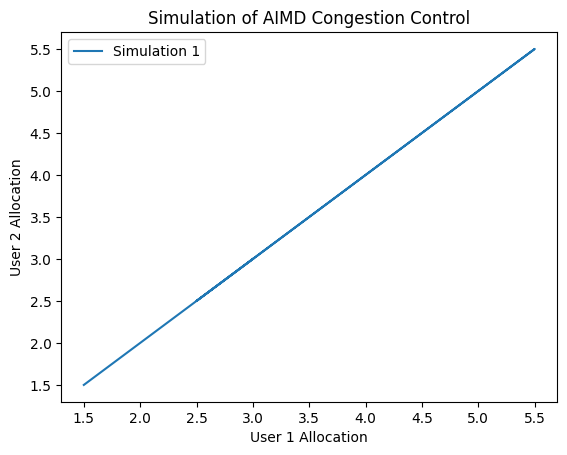

In [14]:
import matplotlib.pyplot as plt

def AIMD(a, b, cwnd, data_packet, RTT_tracker, user_allocations):
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    # Track user allocations
    user1_allocation = cwnd / 2
    user2_allocation = cwnd / 2
    user_allocations[0].append(user1_allocation)
    user_allocations[1].append(user2_allocation)

    return cwnd

def simulate_tcp_congestion(a, b, initial_cwnd_user1, initial_cwnd_user2, num_packets, drop_probability):
    # Set Up for Data
    data_packets = generate_data_packets(num_packets, drop_probability)
    # Parameters
    cwnd_user1 = initial_cwnd_user1
    cwnd_user2 = initial_cwnd_user2

    # Track user allocations
    user_allocations = [[], []]

    # Iterate
    RTT_tracker = []
    for data_packet in data_packets:
        cwnd_user1 = AIMD(a, b, cwnd_user1, data_packet, RTT_tracker, user_allocations)
        cwnd_user2 = AIMD(a, b, cwnd_user2, data_packet, RTT_tracker, user_allocations)

    # Visualize
    x, y = [], []
    for idx, cwnd in enumerate(RTT_tracker):
        x.append(idx + 1)
        y.append(cwnd)

    return x, y, user_allocations

def evaluate_convergence(num_simulations, num_packets, drop_probability, initial_cwnd_user1, initial_cwnd_user2):
    convergence_data = []

    for _ in range(num_simulations):
        x_data, y_data, user_allocations = simulate_tcp_congestion(1, 0.5, initial_cwnd_user1, initial_cwnd_user2, num_packets, drop_probability)
        convergence_data.append((x_data, y_data, user_allocations))

    # Visualize convergence for each simulation
    for idx, (x_data, y_data, user_allocations) in enumerate(convergence_data):
        plt.plot(user_allocations[0], user_allocations[1], label=f'Simulation {idx + 1}')

    # Add labels and legend
    plt.xlabel('User 1 Allocation')
    plt.ylabel('User 2 Allocation')
    plt.title(f'Simulation of AIMD Congestion Control')
    plt.legend()
    plt.show()

# Example usage with different initial values for user allocations
evaluate_convergence(num_simulations=1, num_packets=10, drop_probability=0.2, initial_cwnd_user1=2, initial_cwnd_user2=3)